# case study - favorable words from restaurant reviews

In [140]:
import pandas as pd

In [141]:
%matplotlib inline

In [142]:
business = pd.read_json("D:\MEGA\Data Science\Springboard data science beginner - PYTHON\yelp_dataset\yelp_dataset\yelp_academic_dataset_business.json", lines=True)

In [143]:
business.shape

(160585, 14)

In [144]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [145]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160585 entries, 0 to 160584
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   160585 non-null  object 
 1   name          160585 non-null  object 
 2   address       160585 non-null  object 
 3   city          160585 non-null  object 
 4   state         160585 non-null  object 
 5   postal_code   160585 non-null  object 
 6   latitude      160585 non-null  float64
 7   longitude     160585 non-null  float64
 8   stars         160585 non-null  float64
 9   review_count  160585 non-null  int64  
 10  is_open       160585 non-null  int64  
 11  attributes    145593 non-null  object 
 12  categories    160470 non-null  object 
 13  hours         133244 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 17.2+ MB


In [146]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,160585.000000,160585.000000,160585.000000,160585.000000,160585.000000
mean,38.759794,-94.266212,3.656954,51.964548,0.767494
std,7.138042,19.975446,0.943604,130.030448,0.422431
min,27.998972,-123.393929,1.000000,5.000000,0.000000
25%,30.355886,-122.589583,3.000000,8.000000,1.000000
50%,42.177366,-84.383281,4.000000,17.000000,1.000000
75%,45.458531,-81.288501,4.500000,44.000000,1.000000
max,49.490000,71.113271,5.000000,9185.000000,1.000000


# drop unnecessary columns from the dataframe

In [ ]:
# the following columns will be dropped:
# address, attributes, is_open, latitude, longitude, name, postal_code
# create a list of these columns and drop them from the dataframe
# DO NOT FORGET ABOUT AXIS AND INPLACE arguments

In [147]:
drop_cols = business[['name', 'address', 'attributes', 'is_open', 'latitude', 'longitude', 'postal_code']]
drop_cols

,name,address,attributes,is_open,latitude,longitude,postal_code
0,Oskar Blues Taproom,921 Pearl St,"{'RestaurantsTableService': 'True', 'WiFi': 'u...",1,40.017544,-105.283348,80302
1,Flying Elephants at PDX,7000 NE Airport Way,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...",1,45.588906,-122.593331,97218
2,The Reclaimory,4720 Hawthorne Ave,"{'BusinessAcceptsCreditCards': 'True', 'Restau...",1,45.511907,-122.613693,97214
3,Great Clips,2566 Enterprise Rd,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...",1,28.914482,-81.295979,32763
4,Crossfit Terminus,1046 Memorial Dr SE,"{'GoodForKids': 'False', 'BusinessParking': '{...",1,33.747027,-84.353424,30316
...,...,...,...,...,...,...,...
160580,Eleven Oaks Realty,,None,1,30.272921,-97.744386,78701
160581,Webb's Honey,21777 State Rd 520,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...",1,28.499836,-81.047478,32833
160582,Painting with a Twist,2164 S Chickasaw Trl,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...",0,28.511615,-81.270020,32825
160583,Havana Cafe,910 NW 14th St,"{'RestaurantsTakeOut': 'True', 'RestaurantsDel...",1,45.529647,-122.685153,97209


In [148]:
business.drop(['name', 'address', 'attributes', 'is_open', 'latitude', 'longitude', 'postal_code'], axis=1, inplace=True)

In [149]:
business.shape

(160585, 7)

In [150]:
business.head()

,business_id,city,state,stars,review_count,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Boulder,CO,4.0,86,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Portland,OR,4.0,126,"Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,Portland,OR,4.5,13,"Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Orange City,FL,3.0,8,"Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Atlanta,GA,4.0,14,"Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


# exploratory data analysis using dtale package

In [ ]:
import dtale

In [ ]:
#dtale.show(business)

# most popular restaurant category

In [ ]:
# now we have a much more manageable (width) of data. Remember our first task is to identify the most popular type of restaurant. 
# We now have our eye on the categories column. We could simply count each individual category in this column, just as we did with our pet owners survey. 
# But our categories column isn't quite in the same format as that data. Each item in categories is actually a string, 
# as we demonstrate below, with each item we're interested in separated by commas.

In [151]:
# print the first element of business['categories']
print(business.categories[0])

Gastropubs, Food, Beer Gardens, Restaurants, Bars, American (Traditional), Beer Bar, Nightlife, Breweries


In [152]:
# what is the type of this element
type(business.categories[0])

str

In [153]:
# if the first element were a list, this would return 'Gastropubs', not 'G'
business.categories[0][0]

'G'

In [154]:
business.categories.str.split(pat=', ?')

0         [Gastropubs, Food, Beer Gardens, Restaurants, ...
1         [Salad, Soup, Sandwiches, Delis, Restaurants, ...
2         [Antiques, Fashion, Used, Vintage & Consignmen...
3                              [Beauty & Spas, Hair Salons]
4         [Gyms, Active Life, Interval Training Gyms, Fi...
                                ...                        
160580    [Real Estate, Real Estate Services, Home Servi...
160581      [Health Markets, Food, Specialty Food, Grocery]
160582    [Arts & Entertainment, Paint & Sip, Art Classe...
160583              [Cuban, Sandwiches, Restaurants, Cafes]
160584    [Restaurants, Middle Eastern, Mediterranean, P...
Name: categories, Length: 160585, dtype: object

In [155]:
business.categories.head()

0    Gastropubs, Food, Beer Gardens, Restaurants, B...
1    Salad, Soup, Sandwiches, Delis, Restaurants, C...
2    Antiques, Fashion, Used, Vintage & Consignment...
3                           Beauty & Spas, Hair Salons
4    Gyms, Active Life, Interval Training Gyms, Fit...
Name: categories, dtype: object

In [156]:
category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True)
category_counts.value_counts().head(20)

Beauty & Spas, Hair Salons                   757
Restaurants, Pizza                           748
Hair Salons, Beauty & Spas                   742
Pizza, Restaurants                           740
Beauty & Spas, Nail Salons                   734
Nail Salons, Beauty & Spas                   712
Coffee & Tea, Food                           703
Food, Coffee & Tea                           680
Restaurants, Chinese                         601
Chinese, Restaurants                         588
Mexican, Restaurants                         549
Restaurants, Mexican                         507
Automotive, Auto Repair                      444
Auto Repair, Automotive                      422
Financial Services, Banks & Credit Unions    390
Home Services, Real Estate, Apartments       363
Banks & Credit Unions, Financial Services    347
Real Estate, Home Services, Apartments       345
Real Estate, Apartments, Home Services       344
Home Services, Apartments, Real Estate       342
dtype: int64

<AxesSubplot:>

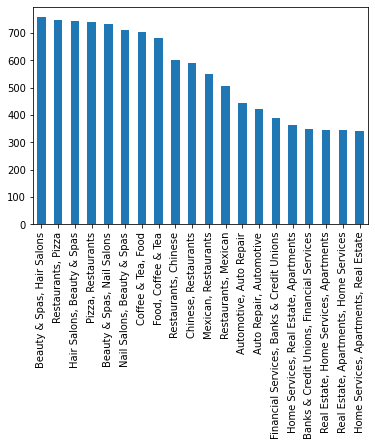

In [157]:
# now we plot this result using a bar plot
category_counts.value_counts().head(20).plot(kind = 'bar')

# cleaning the data

In [158]:
# checking for NAs in the whole dataset
pd.isna(business).sum()

business_id         0
city                0
state               0
stars               0
review_count        0
categories        115
hours           27341
dtype: int64

In [159]:
# checking for NAs in the categories column
# 2 ways of writing the same code
# pd.isna(business.categories).sum()
pd.isna(business['categories']).sum()

115

In [160]:
# let's check some of the NAs previously found
business.loc[pd.isna(business['categories']).sum()].head()

business_id     9VPjqOGkV2ARMr_wIGoCOg
city                            Tucker
state                               GA
stars                              2.0
review_count                        13
Name: 115, dtype: object

In [161]:
# time to remove the NAs from the dataframe
business = business.dropna()

In [162]:
# checking if the NAs were removed
business.shape

(133241, 7)

In [163]:
pd.isna(business['categories']).sum()

0

In [172]:
# filtering to select the rows that are restaurants in the "categories" column
# main way to filter
business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]

In [173]:
business.shape

(42875, 7)

In [175]:
# now we can count different categories for what it should now just be restaurants
restaurant_category_counts = business['categories'].apply(pd.Series).stack().reset_index(drop=True).value_counts().head(20)

In [176]:
restaurant_category_counts.head()

Pizza, Restaurants      527
Restaurants, Pizza      508
Restaurants, Chinese    386
Mexican, Restaurants    380
Chinese, Restaurants    379
dtype: int64

<AxesSubplot:>

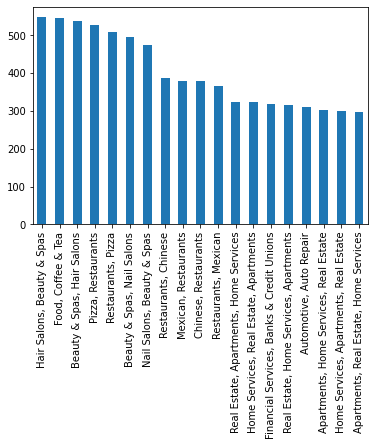

In [170]:
# let's plot to check the frequency in a graph
restaurant_category_counts[1:].plot(kind = 'bar')

# saving the desired business ID to file

In [186]:
# time to create a variable containing 'Pizza' or 'Italian' in the categories column
# # use a lambda function on the categories column but now we're not testing 'Restaurant' but either 'Pizza' or 'Italian'
# business = business.loc[business['categories'].apply(lambda x: 'Restaurants' in x), :]
italian_pizza = business.loc[business['categories'].apply(lambda x: 'Italian' and 'Pizza' in x), :]


In [187]:
italian_pizza.head()

,business_id,city,state,stars,review_count,categories,hours
12,HPA_qyMEddpAEtFof02ixg,Peabody,MA,4.0,39,"Food, Pizza, Restaurants","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
33,QciD6FbNklaJvUbLExD4Nw,Burnaby,BC,4.0,76,"Food Delivery Services, Food, Restaurants, Med...","{'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',..."
54,Z2JC3Yrz82kyS86zEVJG5A,Burlington,MA,3.0,16,"Restaurants, Sandwiches, Pizza","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'..."
63,qbZJh9lR0gh4Wca96NQv9g,Orlando,FL,2.0,15,"Pizza, Event Planning & Services, Arcades, Par...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."
141,L-Stk9lkVfPSFQlrFukCwA,Newton,MA,3.5,205,"Pizza, Restaurants, Food Delivery Services, Fo...","{'Monday': '9:0-22:0', 'Tuesday': '10:0-22:0',..."


In [188]:
italian_pizza.shape

(4931, 7)

In [190]:
# create a csv to save this result in a file
# the index argument should be supressed
# use the columns argument to save only 'business_id', 'review_count', 'stars' and 'state' columns
italian_pizza[['business_id', 'review_count', 'stars', 'state']].to_csv('target.csv', index=False)

In [191]:
pd.read_csv('target.csv').head()

,business_id,review_count,stars,state
0,HPA_qyMEddpAEtFof02ixg,39,4.0,MA
1,QciD6FbNklaJvUbLExD4Nw,76,4.0,BC
2,Z2JC3Yrz82kyS86zEVJG5A,16,3.0,MA
3,qbZJh9lR0gh4Wca96NQv9g,15,2.0,FL
4,L-Stk9lkVfPSFQlrFukCwA,205,3.5,MA
